# importing Libraries and fetching data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt


In [2]:
%matplotlib inline

df = pd.read_csv('data/data.csv')
df.head()

author                                            authors  \
0         dhavalcoholic                                    ICICIPruLifeIns   
1       amitkumarthakur   RAD-Business RAD-Business None barcam10 _snor...   
2  FrustratedOCIHopeful   plshelpthedog ayyylmaaaoo Proper_Boysenberry ...   
3        aloo_vs_bhaloo   vcdarklord tilismilis aloo_vs_bhaloo dogaa fo...   
4             multubunu                                                NaN   

                                                body  \
0  reposting lack activity r askindiahello last y...   
1  24hrs local police station register case dont ...   
2  hello askindia first time poster long time lur...   
3                     r tooafraidtoask india edition   
4  hello submitted r raskindia week ago got answe...   

                                             comment  comms_num       created  \
0  dear policy holder dhavalcoholic request help ...          1  1.386254e+09   
1  calm downgo sp office town file grievance imme...         24  1.554080e+09   
2  honestly supervisor behaved exactly government...         27  1.555361e+09   
3  modi control sex desires jerk someone else pro...         22  1.566529e+09   
4                                                NaN          0  1.361085e+09   

      flair      id  score                                              title  \
0  AskIndia  1s57oi      1  need feedback insurance policy took xpost aski...   
1  AskIndia  b7pvwt     94                     somebody want kill full family   
2  AskIndia  bdfid1     10  ambassador india takes back newly issued oci c...   
3  AskIndia  cu1xn4     18                                randians afraid ask   
4  AskIndia  18ntue      0                    askindia cingari cengar tzengar   

                                                 url  \
0  https://www.reddit.com/r/india/comments/1s57oi...   
1  https://www.reddit.com/r/india/comments/b7pvwt...   
2  https://www.reddit.com/r/india/comments/bdfid1...   
3  https://www.reddit.com/r/india/comments/cu1xn4...   
4  https://www.reddit.com/r/india/comments/18ntue...   

                                   combined_features  
0  need feedback insurance policy took xpost aski...  
1  somebody want kill full familycalm downgo sp o...  
2  ambassador india takes back newly issued oci c...  
3  randians afraid askmodi control sex desires je...  
4  askindia cingari cengar tzengarhttps://www.red...

# No. of occurrences of each flair

AskIndia  =  200
Non-Political  =  200
[R]eddiquette  =  0
Scheduled  =  200
Photography  =  200
Science/Technology  =  200
Politics  =  200
Business/Finance  =  200
Policy/Economy  =  200
Sports  =  200
Food  =  200
AMA  =  200

NaN in - 

author                  0
authors               107
body                 1218
comment               107
comms_num               0
created                 0
flair                   0
id                      0
score                   0
title                   0
url                     0
combined_features       0
dtype: int64


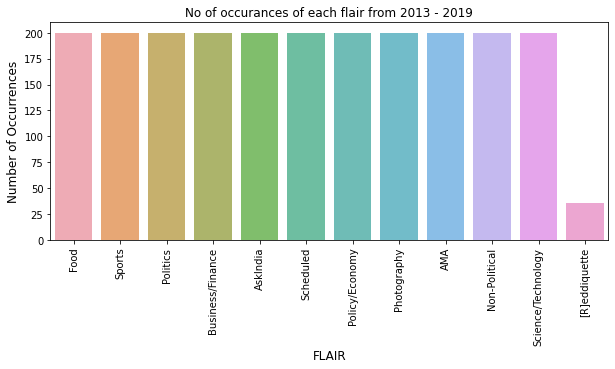

In [3]:
import seaborn as sns
cnt_pro = df['flair'].value_counts()

plt.figure(figsize=(10,4))
sns.barplot(cnt_pro.index, cnt_pro.values, alpha=0.8)

plt.title("No of occurances of each flair from 2013 - 2019")
plt.xticks(rotation=90)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('FLAIR', fontsize=12)


flairs = [ "AskIndia", "Non-Political", "[R]eddiquette",
          "Scheduled", "Photography", "Science/Technology",
          "Politics", "Business/Finance", "Policy/Economy",
          "Sports", "Food", "AMA"]

for i in flairs:
    print(i, " = " ,int(df.flair.str.count(i).sum()))


print("")   
print("NaN in - ")
print("")    
print(df.isna().sum())
# plt.savefig('images/1.png')

# No of words in title vs No. of posts

Text(0, 0.5, 'Number of posts')

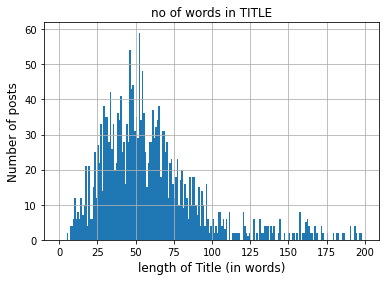

In [4]:

# distribution of no of words in title

temp = df.title.str.len()
temp.hist(bins = np.arange(0,200,1))
plt.title("no of words in TITLE")
plt.xlabel("length of Title (in words)", fontsize=12)
plt.ylabel("Number of posts", fontsize=12)


# No of words in body vs No. of posts

number with no body = 1218
number with body = 58455
means - most of them dont have a body


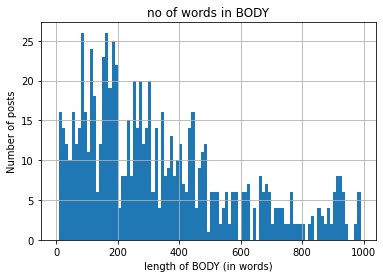

In [5]:

# distribution of no. of words in body
print("number with no body =",df['body'].isnull().sum())
print("number with body =",59673 - df['body'].isnull().sum())


temp = df.body.str.len()
temp.hist(bins = np.arange(0,1000,10))
plt.title("no of words in BODY")
plt.xlabel("length of BODY (in words)")
plt.ylabel("Number of posts")


print("means - most of them dont have a body")

among the one with body - most of them have words from 30 to 200


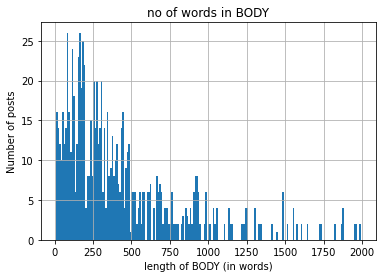

In [6]:
# distribution of no. of words in body 

temp = df.body.str.len()
temp.hist(bins = np.arange(10,2000,10))
plt.title("no of words in BODY")
plt.xlabel("length of BODY (in words)")
plt.ylabel("Number of posts")


print("among the one with body - most of them have words from 30 to 200")

# No. of upvotes vs Number of posts 

Text(0, 0.5, 'Number of posts')

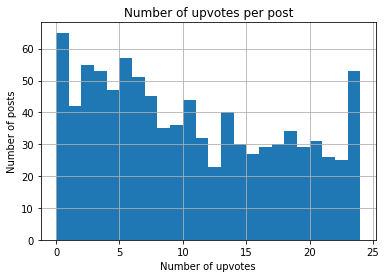

In [7]:

temp = df.score
temp.hist(bins = np.arange(0,25,1))
plt.title("Number of upvotes per post")
plt.xlabel("Number of upvotes")
plt.ylabel("Number of posts")


# No. of comments vs No. of posts

Text(0, 0.5, 'Number of posts')

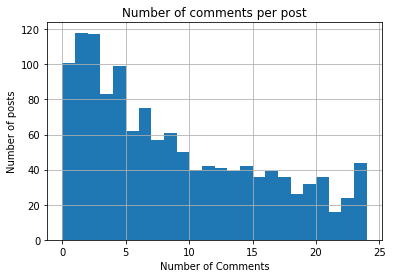

In [8]:
temp = df.comms_num
temp.hist(bins = np.arange(0,25,1))


plt.title("Number of comments per post")
plt.xlabel("Number of Comments")
plt.ylabel("Number of posts")


In [9]:
df.dtypes


author                object
authors               object
body                  object
comment               object
comms_num              int64
created              float64
flair                 object
id                    object
score                  int64
title                 object
url                   object
combined_features     object
dtype: object

# arranging data chronologically

In [10]:
def get_date(created):
    return dt.datetime.fromtimestamp(created)

In [11]:

df['timestamp'] = df['created'].apply(get_date)
df.head()

author                                            authors  \
0         dhavalcoholic                                    ICICIPruLifeIns   
1       amitkumarthakur   RAD-Business RAD-Business None barcam10 _snor...   
2  FrustratedOCIHopeful   plshelpthedog ayyylmaaaoo Proper_Boysenberry ...   
3        aloo_vs_bhaloo   vcdarklord tilismilis aloo_vs_bhaloo dogaa fo...   
4             multubunu                                                NaN   

                                                body  \
0  reposting lack activity r askindiahello last y...   
1  24hrs local police station register case dont ...   
2  hello askindia first time poster long time lur...   
3                     r tooafraidtoask india edition   
4  hello submitted r raskindia week ago got answe...   

                                             comment  comms_num       created  \
0  dear policy holder dhavalcoholic request help ...          1  1.386254e+09   
1  calm downgo sp office town file grievance imme...         24  1.554080e+09   
2  honestly supervisor behaved exactly government...         27  1.555361e+09   
3  modi control sex desires jerk someone else pro...         22  1.566529e+09   
4                                                NaN          0  1.361085e+09   

      flair      id  score                                              title  \
0  AskIndia  1s57oi      1  need feedback insurance policy took xpost aski...   
1  AskIndia  b7pvwt     94                     somebody want kill full family   
2  AskIndia  bdfid1     10  ambassador india takes back newly issued oci c...   
3  AskIndia  cu1xn4     18                                randians afraid ask   
4  AskIndia  18ntue      0                    askindia cingari cengar tzengar   

                                                 url  \
0  https://www.reddit.com/r/india/comments/1s57oi...   
1  https://www.reddit.com/r/india/comments/b7pvwt...   
2  https://www.reddit.com/r/india/comments/bdfid1...   
3  https://www.reddit.com/r/india/comments/cu1xn4...   
4  https://www.reddit.com/r/india/comments/18ntue...   

                                   combined_features           timestamp  
0  need feedback insurance policy took xpost aski... 2013-12-05 20:00:23  
1  somebody want kill full familycalm downgo sp o... 2019-04-01 06:30:35  
2  ambassador india takes back newly issued oci c... 2019-04-16 02:11:42  
3  randians afraid askmodi control sex desires je... 2019-08-23 08:30:59  
4  askindia cingari cengar tzengarhttps://www.red... 2013-02-17 12:38:21

In [12]:

df = df.set_index('timestamp')
df.head()

author  \
timestamp                                   
2013-12-05 20:00:23         dhavalcoholic   
2019-04-01 06:30:35       amitkumarthakur   
2019-04-16 02:11:42  FrustratedOCIHopeful   
2019-08-23 08:30:59        aloo_vs_bhaloo   
2013-02-17 12:38:21             multubunu   

                                                               authors  \
timestamp                                                                
2013-12-05 20:00:23                                    ICICIPruLifeIns   
2019-04-01 06:30:35   RAD-Business RAD-Business None barcam10 _snor...   
2019-04-16 02:11:42   plshelpthedog ayyylmaaaoo Proper_Boysenberry ...   
2019-08-23 08:30:59   vcdarklord tilismilis aloo_vs_bhaloo dogaa fo...   
2013-02-17 12:38:21                                                NaN   

                                                                  body  \
timestamp                                                                
2013-12-05 20:00:23  reposting lack activity r askindiahello last y...   
2019-04-01 06:30:35  24hrs local police station register case dont ...   
2019-04-16 02:11:42  hello askindia first time poster long time lur...   
2019-08-23 08:30:59                     r tooafraidtoask india edition   
2013-02-17 12:38:21  hello submitted r raskindia week ago got answe...   

                                                               comment  \
timestamp                                                                
2013-12-05 20:00:23  dear policy holder dhavalcoholic request help ...   
2019-04-01 06:30:35  calm downgo sp office town file grievance imme...   
2019-04-16 02:11:42  honestly supervisor behaved exactly government...   
2019-08-23 08:30:59  modi control sex desires jerk someone else pro...   
2013-02-17 12:38:21                                                NaN   

                     comms_num       created     flair      id  score  \
timestamp                                                               
2013-12-05 20:00:23          1  1.386254e+09  AskIndia  1s57oi      1   
2019-04-01 06:30:35         24  1.554080e+09  AskIndia  b7pvwt     94   
2019-04-16 02:11:42         27  1.555361e+09  AskIndia  bdfid1     10   
2019-08-23 08:30:59         22  1.566529e+09  AskIndia  cu1xn4     18   
2013-02-17 12:38:21          0  1.361085e+09  AskIndia  18ntue      0   

                                                                 title  \
timestamp                                                                
2013-12-05 20:00:23  need feedback insurance policy took xpost aski...   
2019-04-01 06:30:35                     somebody want kill full family   
2019-04-16 02:11:42  ambassador india takes back newly issued oci c...   
2019-08-23 08:30:59                                randians afraid ask   
2013-02-17 12:38:21                    askindia cingari cengar tzengar   

                                                                   url  \
timestamp                                                                
2013-12-05 20:00:23  https://www.reddit.com/r/india/comments/1s57oi...   
2019-04-01 06:30:35  https://www.reddit.com/r/india/comments/b7pvwt...   
2019-04-16 02:11:42  https://www.reddit.com/r/india/comments/bdfid1...   
2019-08-23 08:30:59  https://www.reddit.com/r/india/comments/cu1xn4...   
2013-02-17 12:38:21  https://www.reddit.com/r/india/comments/18ntue...   

                                                     combined_features  
timestamp                                                               
2013-12-05 20:00:23  need feedback insurance policy took xpost aski...  
2019-04-01 06:30:35  somebody want kill full familycalm downgo sp o...  
2019-04-16 02:11:42  ambassador india takes back newly issued oci c...  
2019-08-23 08:30:59  randians afraid askmodi control sex desires je...  
2013-02-17 12:38:21  askindia cingari cengar tzengarhttps://www.red...

# No. of comments as the time progresses

Text(0, 0.5, 'Number of comments')

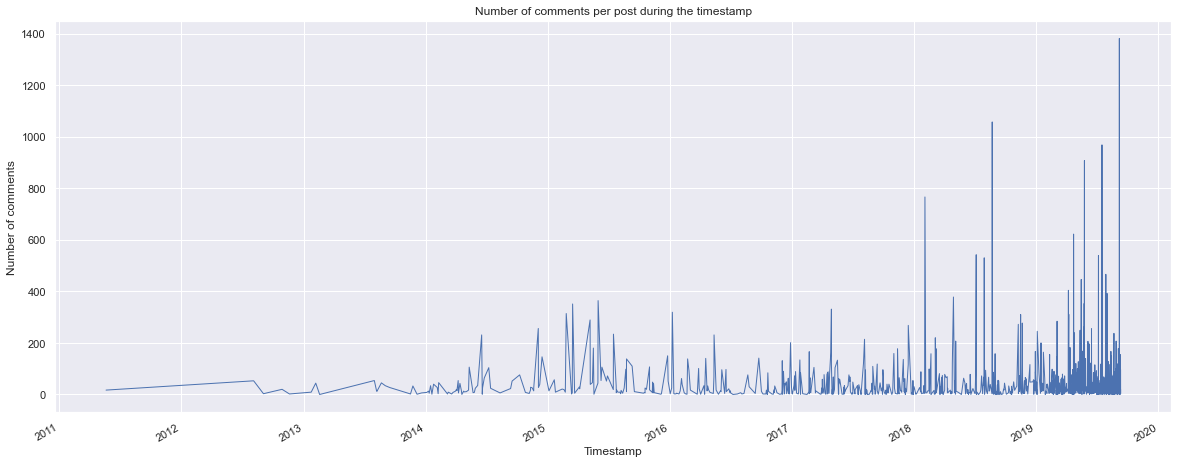

In [13]:
import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(20, 8)})

df['comms_num'].plot(linewidth=1);


plt.title("Number of comments per post during the timestamp")
plt.xlabel("Timestamp")
plt.ylabel("Number of comments")


No. of comments can be a good indicator of change in activity with time, this graph shows increase in user activity from 2013 to 2019

# No of comments vs No. of upvotes

No handles with labels found to put in legend.


flair
AMA                   AxesSubplot(0.125,0.125;0.775x0.755)
AskIndia              AxesSubplot(0.125,0.125;0.775x0.755)
Business/Finance      AxesSubplot(0.125,0.125;0.775x0.755)
Food                  AxesSubplot(0.125,0.125;0.775x0.755)
Non-Political         AxesSubplot(0.125,0.125;0.775x0.755)
Photography           AxesSubplot(0.125,0.125;0.775x0.755)
Policy/Economy        AxesSubplot(0.125,0.125;0.775x0.755)
Politics              AxesSubplot(0.125,0.125;0.775x0.755)
Scheduled             AxesSubplot(0.125,0.125;0.775x0.755)
Science/Technology    AxesSubplot(0.125,0.125;0.775x0.755)
Sports                AxesSubplot(0.125,0.125;0.775x0.755)
[R]eddiquette         AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

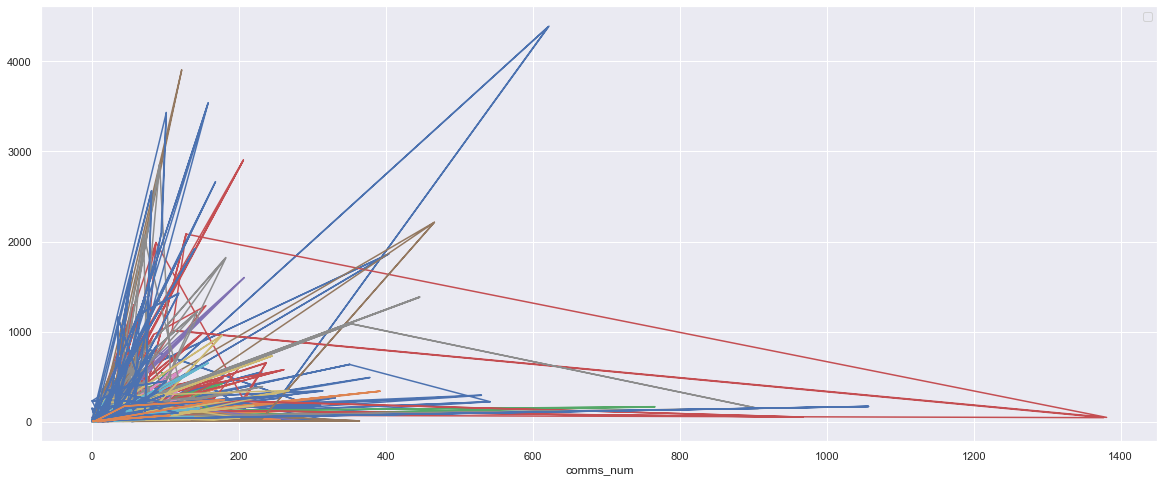

In [14]:
fig, ax = plt.subplots()
plt.legend()
df.groupby('flair').plot(x='comms_num', y='score',  ax=ax, legend=False)


# Average number of upvotes per flair

score
flair                      
AMA                 193.930
AskIndia             37.340
Business/Finance     68.225
Food                234.450
Non-Political        81.610
Photography         156.535
Policy/Economy       60.830
Politics            226.835
Scheduled            76.810
Science/Technology   47.835

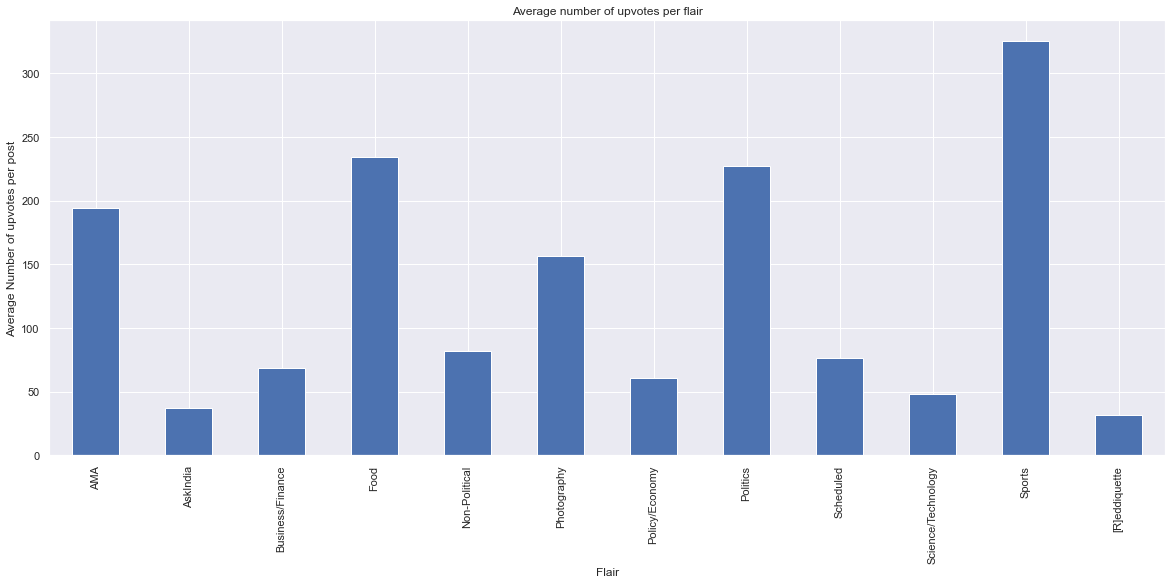

In [15]:
df2 = df.groupby("flair").mean()[['score']]

df2.plot(kind='bar', legend=False, grid=True)
plt.title("Average number of upvotes per flair")

plt.xlabel("Flair")
plt.ylabel("Average Number of upvotes per post")
#plt.savefig('images/10.png')

df2.head(10)

# Average Number of comments per post

comms_num
flair                        
AMA                    98.020
AskIndia               42.075
Business/Finance       41.095
Food                   71.695
Non-Political          23.005
Photography            32.975
Policy/Economy         25.115
Politics               58.185
Scheduled              36.390
Science/Technology     20.020

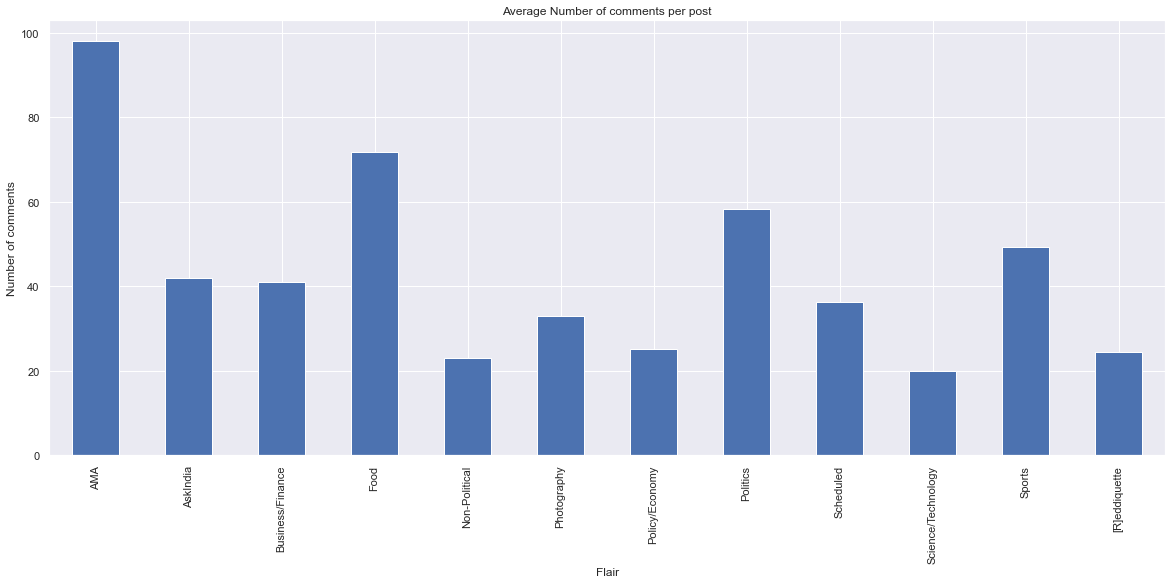

In [16]:
df3 = df.groupby("flair").mean()[['comms_num']]

df3.plot(kind='bar', legend=False, grid=True)
plt.title("Average Number of comments per post")

plt.xlabel("Flair")
plt.ylabel("Number of comments")


df3.head(10)


In [17]:
df.body.fillna(" ",inplace=True)

# word cloud for the entire text data

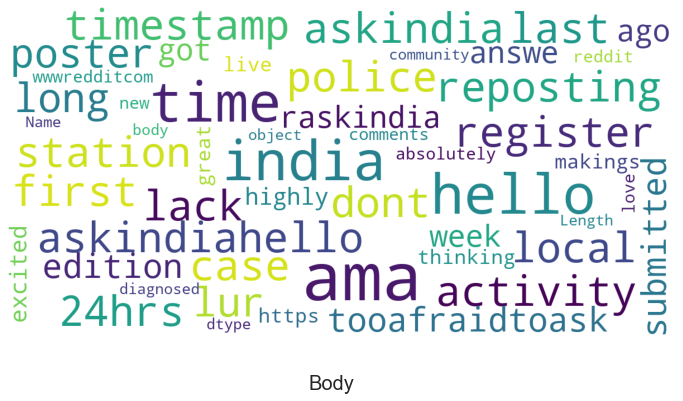

In [18]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df.body,"Body")


# Word cloud of each flair corpus

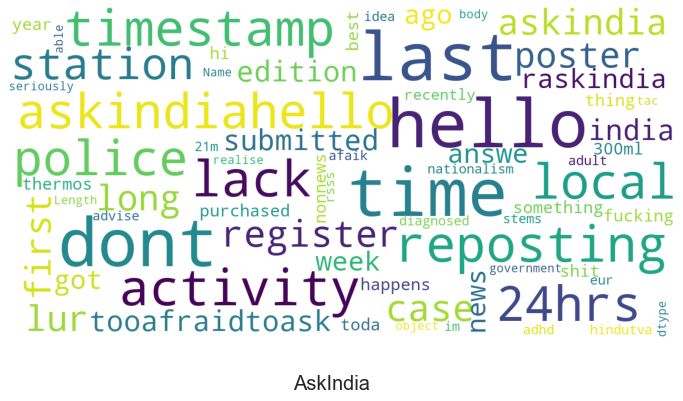

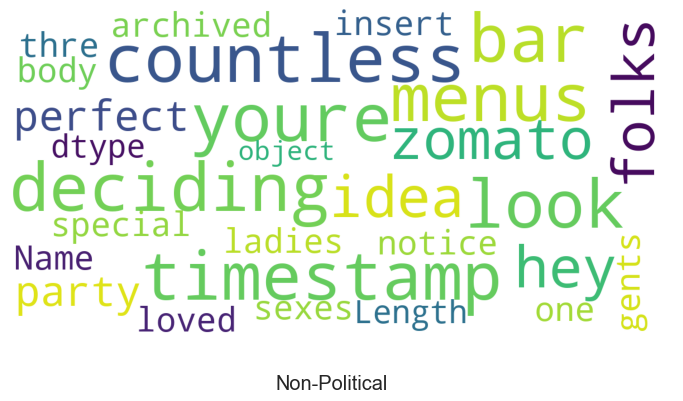

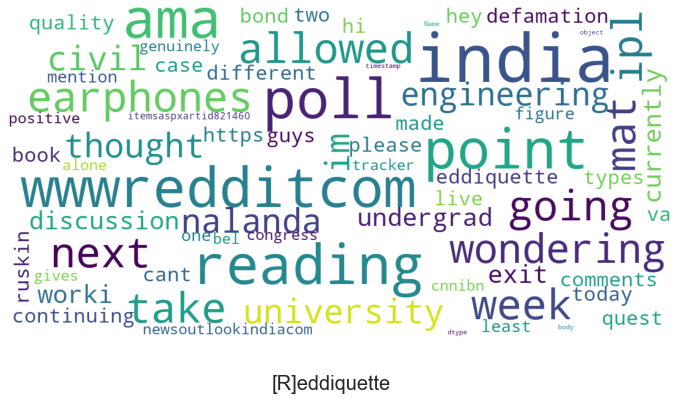

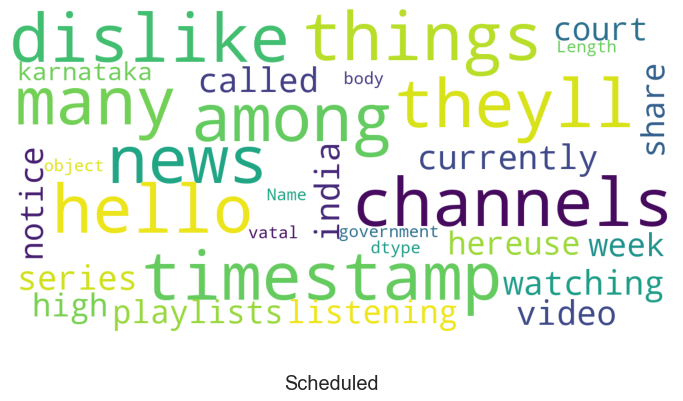

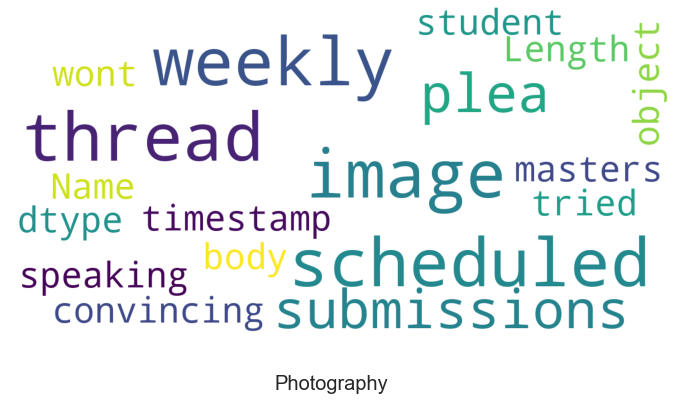

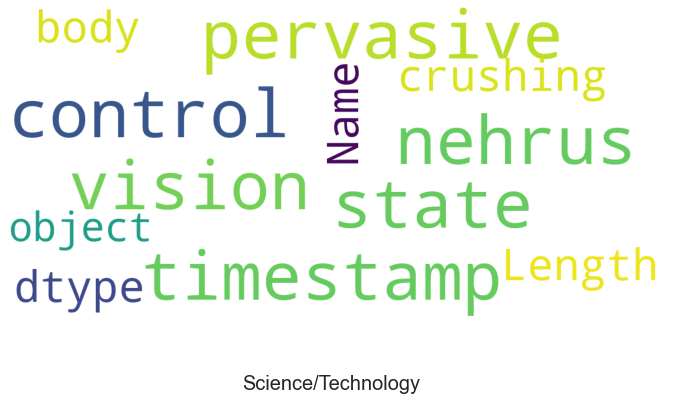

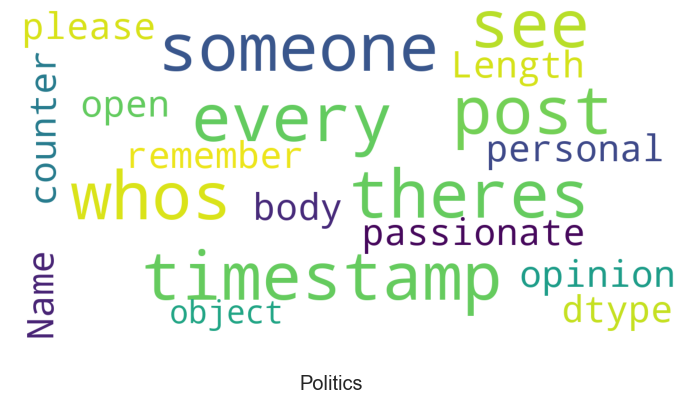

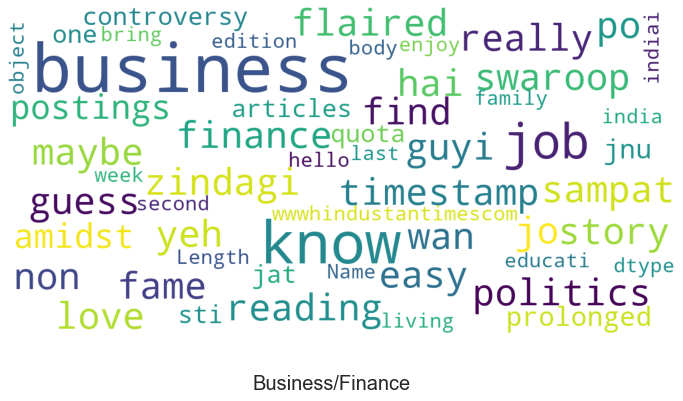

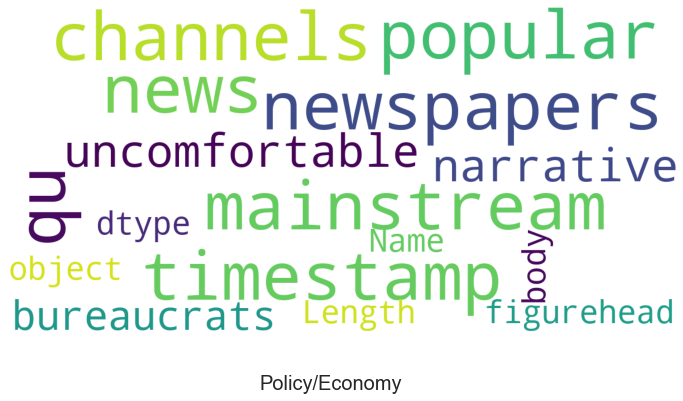

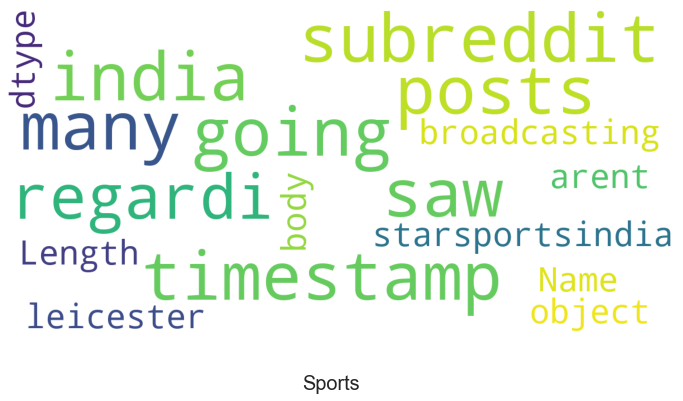

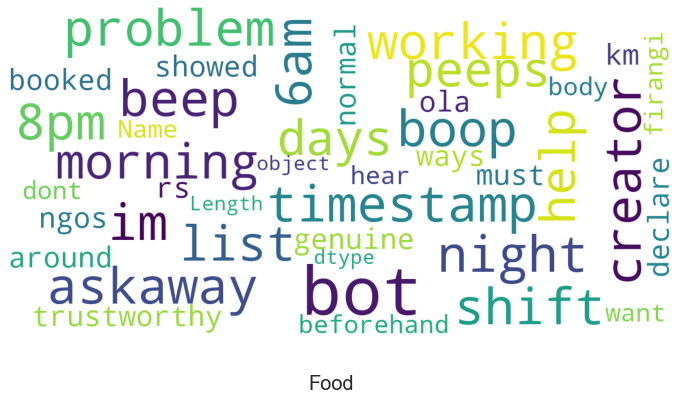

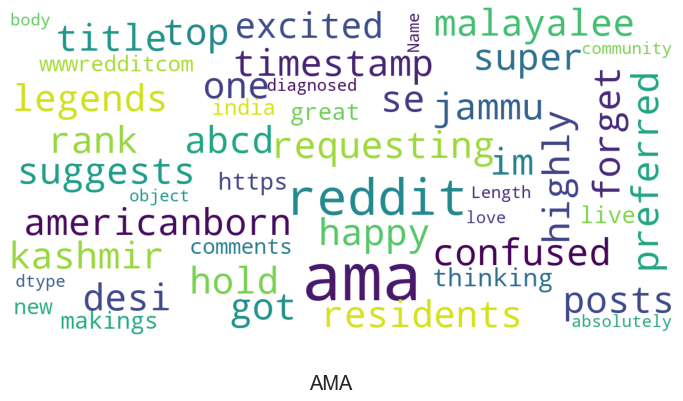

In [19]:
for flair in flairs:
    show_wordcloud(df[df['flair'] == flair]['body'],flair)


# TF-IDF Plot of different categories of flair 

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

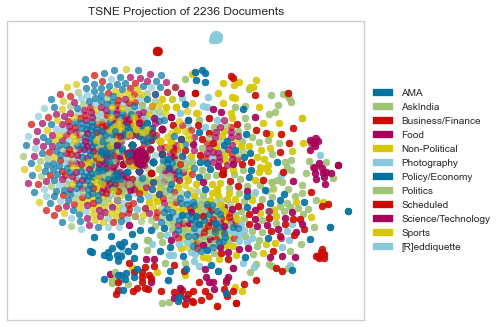

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

from yellowbrick.text import TSNEVisualizer
from yellowbrick.datasets import load_hobbies

# Load the data and create document vectors
tfidf = TfidfVectorizer()

X = tfidf.fit_transform(df.body)
y = df.flair

# Create the visualizer and draw the vectors
tsne = TSNEVisualizer()
tsne.fit(X, y)
tsne.show()

this can give us a good idea on the overlap of text data of different flairs with each other.

# Visualizing Doc2Vec Document embeddings using TSNE

In [21]:
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

from MulticoreTSNE import MulticoreTSNE as TSNE


unable to import 'smart_open.gcs', disabling that module


In [22]:
label = {v:k for k,v in enumerate(flairs)}

df['flair'] = df['flair'].apply(lambda x : label[x])
df.flair

timestamp
2013-12-05 20:00:23     0
2019-04-01 06:30:35     0
2019-04-16 02:11:42     0
2019-08-23 08:30:59     0
2013-02-17 12:38:21     0
                       ..
2017-07-07 20:09:24    11
2016-01-08 07:36:42    11
2016-06-04 05:36:15    11
2015-05-17 03:08:55    11
2018-04-28 00:03:12    11
Name: flair, Length: 2236, dtype: int64

In [23]:
# Storing the question texts in a list
texts = list(df.body)

# Creating a list of terms and a list of labels to go with it
documents = [TaggedDocument(doc, tags=[str(i)]) for i, doc in enumerate(texts)]

In [24]:
max_epochs = 100
alpha=0.025
model = Doc2Vec(documents,
                size=10, 
                min_alpha=0.00025,
                alpha=alpha,
                min_count=1,
#                 window=2, 
                workers=4)

In [25]:
# Creating and fitting the tsne model to the document embeddings
tsne_model = TSNE(n_jobs=4,
                  early_exaggeration=4,
                  n_components=2,
                  verbose=1,
                  random_state=2018,
                  n_iter=300)
tsne_d2v = tsne_model.fit_transform(model.docvecs.vectors_docs)

# Putting the tsne information into sq
tsne_d2v_df = pd.DataFrame(data=tsne_d2v, columns=["x", "y"])
# tsne_tfidf_df.columns = ["x", "y"]
tsne_d2v_df["id"] = df['id'].values
tsne_d2v_df["body"] = df["body"].values
tsne_d2v_df["flair"] = df["flair"].values

In [26]:
import bokeh.plotting as bp
from bokeh.models import HoverTool, BoxSelectTool
from bokeh.models import ColumnDataSource
from bokeh.plotting import figure, show, output_notebook, reset_output
from bokeh.palettes import d3
import bokeh.models as bmo
from bokeh.io import save, output_file


In [27]:
output_notebook()
plot_d2v = bp.figure(plot_width = 800, plot_height = 700, 
                       title = "T-SNE applied to Doc2vec document embeddings",
                       tools = "pan, wheel_zoom, box_zoom, reset, hover",
                       x_axis_type = None, y_axis_type = None, min_border = 1)

# colormap = np.array(["#6d8dca", "#d07d3c"])
colormap = np.array(["darkblue", "cyan",'red','orange','purple','yellow','pink','brown','green','black','lavendar','lightblue'])

# palette = d3["Category10"][len(tsne_tfidf_df["asset_name"].unique())]
source = ColumnDataSource(data = dict(x = tsne_d2v_df["x"], 
                                      y = tsne_d2v_df["y"],
                                      color = colormap[tsne_d2v_df["flair"]],
                                      body = tsne_d2v_df["body"],
                                      id = tsne_d2v_df["id"],
                                      flair = tsne_d2v_df["flair"]))

plot_d2v.scatter(x = "x", 
                   y = "y", 
                   color="color",
                   legend = "flair",
                   source = source,
                   alpha = 0.7)
hover = plot_d2v.select(dict(type = HoverTool))
hover.tooltips = {"id": "@id", 
                  "body": "@body", 
                  "flair":"@flair"}

show(plot_d2v)

Loading BokehJS ...

we can see there is significant overlap in doc2vec word embeddings of different flair categories


Lets move on the flair detection